# Estrategia de interacción con clientes del gimnasios Model Fitness

Gimnasios Model Fitness busca calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos, sin embargo, a veces no es obvio, porque los indicadores de pérdida varían de un campo a otro.Entonces el objetivo es poneron el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes, `por lo tanto, el objetivo principal que realizaremos consiste en analizarlos y elaborar una estrategia de retención de clientes.

Los objetivos a lograr son:
- Predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
Cr conclusiones básicas y elaborar recomendaciones para mejorar la atención al cnte   :
	- identificar a los grupos objetivo;
	- sugerir medidas para reducir la rotación;
	- describir cualquier otro patrón que observes con respecto a la interacción con los clientes.os.

# Tabla de Contenido<a id='back'></a>

1. [Descarga los datos](#step1)
2. [Descripción de los datos](#step2)
3. [Preparar los datos para el análisis](#step3)
4. [Análisis exploratorio de datos](#step4)
5. [Construcción de un modelo para predecir la cancelación de usuarios](#step5)
6. [Creación clústeres de usuarios](#step6) 
7. [Conclusiones y recomendaciones básicas sobre el trabajo con clientes](#step7)

##  1. Descarga los datos<a name='step1'></a>

Importando las librerías necesarias para este proyecto.

In [1]:
#Librerías DA
import pandas as pd
import numpy as np #operaciones matemáticas

#Librerías para datos fecha/hora 
import datetime as dt
from datetime import datetime 
import math as mth

#Librerias Gráfico
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

#Libreria HTML
from IPython.display import display, HTML

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
#Librerías ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV

sns.set_palette('bright')
pd.set_option('max_colwidth', 450) 

Ahora cargamos los datos del DataFrame.

In [2]:
# Se carga el archivo de datos que nos compartieron
try:
    data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv')
except:
    data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Conocer a detalle la base de datos
data.info()
display(HTML('<br>'))
display(data.sample())
display(HTML('<br>'))
display(data.head(10))
display(HTML('<br>'))
print('Valores faltantes:')
print(data.isnull().sum(),'\n\n')
print('Duplicados:')
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
2506       0              1        1              1      1                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
2506             1   30                    179.340499                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
2506         0                   2.570382                           2.576688   

      Churn  
2506      0

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   
5             1   34                    450.743960                    1.0   
6             1   32                     94.266389                    6.0   
7             0   30                    217.786641                    1.0   
8             1   23                     45.409909                    1.0   
9             0   31                     65.310836                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      1  
8      0  
9      0

Valores faltantes:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64 


Duplicados:
0


En primer vistazo, encontramos lo siguiente:

- Los datos constan de 4000 filas y 14 columnas.
- Los nombres de las columnas contienen letras mayúsculas y minúsculas.
- Los valores están en formato numérico, la mayoría de los datos son 1 o 0.
- No hay valores faltantes ni valores duplicados.
- La mayoría de los tipos de datos son tipos "int", a excepción de las columnas ` Avg_additional_charges_total`, `Avg_class_frequency_total` y `Avg_class_frequency_current_month` que son "float" porque son promedios.
- Pero la columna `Month_to_end_contract`, está con tipo de dato "float" y solo se habla de meses debe ser "int", requiere corregir.
  

##  2. Descripción de los datos<a name='step2'></a>

A continuación, descripción del dataset que incluye los siguientes campos:

- 'Churn': la cancelación para el mes en cuestión

- Campos de datasetactuales:
	- Datos del usuario del mes anterior
		- 'gender'.
		- 'Near_Location': si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
		- 'Partner': si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
		- Promo_friends: si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
		- 'Phone': si el/la usuario/a aportó el número de teléfono.
		- 'Age'.
		- 'Lifetime': el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

 
    
- Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:

	- 'Contract_period': 1 mes, 3 meses, 6 meses o 1 año.
	- 'Month_to_end_contract': los meses que faltan hasta que expire el contrato.
	- 'Group_visits': si el/la usuario/a participa en sesiones grupales.
	- 'Avg_class_frequency_total': frecuencia media de visitas por semana a lo largo de la vida del cliente.
	- 'Avg_class_frequency_current_month': frecuencia media de visitas por semana durante el mes en curso.
	- 'Avg_additional_charges_total': cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

Veremos a detalle cada columna en el siguiente sección.

##  3. Preparar los datos para el análisis<a name='step3'></a>

Primer paso para preparar los datos, tenemos que cambiar los nombres de las columnas porque contienen letras mayúsculas y minúsculas.

In [4]:
# Cambiar columna a minúsculas
data.columns = [x.lower() for x in data.columns]
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Veremos un vistazo más de cerca de algunas columnas individuales:

In [5]:
display(data['gender'].value_counts())
display(HTML('<br>'))
display(data['near_location'].value_counts())
display(HTML('<br>'))
display(data['partner'].value_counts())
display(HTML('<br>'))
display(data['promo_friends'].value_counts())
display(HTML('<br>'))
display(data['phone'].value_counts())
display(HTML('<br>'))
display(data['contract_period'].value_counts())
display(HTML('<br>'))
display(data['group_visits'].value_counts())
display(HTML('<br>'))
display(data['age'].value_counts())
display(HTML('<br>'))
display(data['month_to_end_contract'].value_counts())
display(HTML('<br>'))
display(data['lifetime'].value_counts())
display(HTML('<br>'))
display(data['churn'].value_counts())

gender
1    2041
0    1959
Name: count, dtype: int64

near_location
1    3381
0     619
Name: count, dtype: int64

partner
0    2053
1    1947
Name: count, dtype: int64

promo_friends
0    2766
1    1234
Name: count, dtype: int64

phone
1    3614
0     386
Name: count, dtype: int64

contract_period
1     2207
12     960
6      833
Name: count, dtype: int64

group_visits
0    2351
1    1649
Name: count, dtype: int64

age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: count, dtype: int64

month_to_end_contract
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: count, dtype: int64

lifetime
1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
20      7
19      7
18      7
21      5
23      2
24      2
26      2
22      2
31      1
27      1
29      1
Name: count, dtype: int64

churn
0    2939
1    1061
Name: count, dtype: int64

Con lo anterior, podemos ver que es necesario cambiar el tipo de datos de la columna `month_to_end_contract` que habla de meses (números exactos):

In [6]:
# Cambiar el tipo de dato de la columna month_to_end_contract 
data.month_to_end_contract = data.month_to_end_contract.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Encontramos lo siguiente:

Muchas columnas son entradas booleanas.
Aproximadamente la mitad de los clientes tiene un contrato de 1 mes, aproximadamente un cuarto tiene un contrato de 6 meses y el otro cuarto tiene un contrato de 12 meses.
La mayoría de los clientes tienen entre 20 y 30 años.
Aproximadamente un cuarto de los clientes del mes en cuestión tienen el estado "Churn", es decir, no han visitado durante un mes.

##  4. Análisis exploratorio de datos (EDA)<a name='step4'></a>

#### 4.1 Alguna característica ausente.

In [7]:
print('Valores faltantes:')
print(data.isnull().sum())

Valores faltantes:
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


Están completos los valores.

#### 4.2 Estudiar los valores promedio y la desviación estándar.

In [8]:
data_describe = data.describe().T.reset_index()
data_describe = data_describe.rename(columns = {'index': 'feature'})
data_describe

feature   count        mean        std  \
0                              gender  4000.0    0.510250   0.499957   
1                       near_location  4000.0    0.845250   0.361711   
2                             partner  4000.0    0.486750   0.499887   
3                       promo_friends  4000.0    0.308500   0.461932   
4                               phone  4000.0    0.903500   0.295313   
5                     contract_period  4000.0    4.681250   4.549706   
6                        group_visits  4000.0    0.412250   0.492301   
7                                 age  4000.0   29.184250   3.258367   
8        avg_additional_charges_total  4000.0  146.943728  96.355602   
9               month_to_end_contract  4000.0    4.322750   4.191297   
10                           lifetime  4000.0    3.724750   3.749267   
11          avg_class_frequency_total  4000.0    1.879020   0.972245   
12  avg_class_frequency_current_month  4000.0    1.767052   1.052906   
13                              churn  4000.0    0.265250   0.441521   

          min        25%         50%         75%         max  
0    0.000000   0.000000    1.000000    1.000000    1.000000  
1    0.000000   1.000000    1.000000    1.000000    1.000000  
2    0.000000   0.000000    0.000000    1.000000    1.000000  
3    0.000000   0.000000    0.000000    1.000000    1.000000  
4    0.000000   1.000000    1.000000    1.000000    1.000000  
5    1.000000   1.000000    1.000000    6.000000   12.000000  
6    0.000000   0.000000    0.000000    1.000000    1.000000  
7   18.000000  27.000000   29.000000   31.000000   41.000000  
8    0.148205  68.868830  136.220159  210.949625  552.590740  
9    1.000000   1.000000    1.000000    6.000000   12.000000  
10   0.000000   1.000000    3.000000    5.000000   31.000000  
11   0.000000   1.180875    1.832768    2.536078    6.023668  
12   0.000000   0.963003    1.719574    2.510336    6.146783  
13   0.000000   0.000000    0.000000    1.000000    1.000000

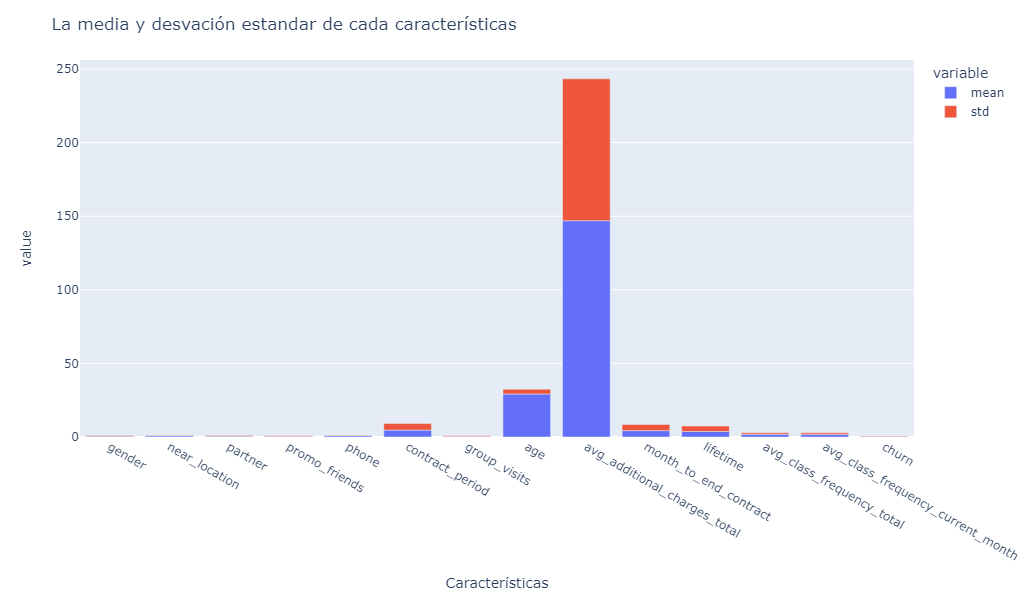

In [9]:
# Gráfico de barras 
fig = px.bar(data_describe, x='feature', y=['mean', 'std'], 
             width=990, height=600, 
             labels = {'feature': 'Características '})

# Personalizar el texto interno del gráfico
fig.update_traces(textposition='outside')
fig.update_layout(title_text="La media y desvación estandar de cada características")
fig.show()

De acuerdo al gráfico anterior, al comparar la media con desvación estandar podemos ver si hay valores atípicos.

Con los datos de estadísticas podemo definir que el cliente típico de un gimnasio tiene 29 años, vive o trabaja cerca del gimnasio, el cliente tiene un contrato de 4.5 meses y visita el gimnasio 1.8 veces al mes; lo ha estado haciendo durante los últimos 4 meses. Gasta 147 extra en el gimnasio y tiene su número de teléfono lo tiene el gimnasio.

##### Evaluar el desglose del estado del período del contrato.

In [10]:
contract_table = data.pivot_table(index = ['churn', 'contract_period'], values = 'age', aggfunc = 'count').reset_index()
contract_table = contract_table.rename(columns= {'age': 'count'})
contract_table

churn  contract_period  count
0      0                1   1273
1      0                6    729
2      0               12    937
3      1                1    934
4      1                6    104
5      1               12     23

La cantidad de clientes según el período del contrato es diferente entre los clientes actuales y los que abandonaron. Entonces vamos a crear dummy features para separar los períodos de la columna de contrato de los clientes `contract_period`.

In [11]:
data = pd.get_dummies(data = data, columns = ['contract_period'])
data.head()

gender  near_location  partner  promo_friends  phone  group_visits  age  \
0       1              1        1              1      0             1   29   
1       0              1        0              0      1             1   31   
2       0              1        1              0      1             0   28   
3       0              1        1              1      1             1   33   
4       1              1        1              1      1             0   26   

   avg_additional_charges_total  month_to_end_contract  lifetime  \
0                     14.227470                      5         3   
1                    113.202938                     12         7   
2                    129.448479                      1         2   
3                     62.669863                     12         2   
4                    198.362265                      1         3   

   avg_class_frequency_total  avg_class_frequency_current_month  churn  \
0                   0.020398                           0.000000      0   
1                   1.922936                           1.910244      0   
2                   1.859098                           1.736502      0   
3                   3.205633                           3.357215      0   
4                   1.113884                           1.120078      0   

   contract_period_1  contract_period_6  contract_period_12  
0              False               True               False  
1              False              False                True  
2               True              False               False  
3              False              False                True  
4               True              False               False

De esta manera, ya quedo separado cada período de tiempo del contrato. 

#### 4.3 Observar los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.

In [12]:
data.groupby('churn').mean().T

churn                                       0           1
gender                               0.510037    0.510839
near_location                        0.873086    0.768143
partner                              0.534195    0.355325
promo_friends                        0.353522    0.183789
phone                                0.903709    0.902922
group_visits                         0.464103    0.268615
age                                 29.976523   26.989632
avg_additional_charges_total       158.445715  115.082899
month_to_end_contract                5.283089    1.662582
lifetime                             4.711807    0.990575
avg_class_frequency_total            2.024876    1.474995
avg_class_frequency_current_month    2.027882    1.044546
contract_period_1                    0.433141    0.880302
contract_period_6                    0.248044    0.098021
contract_period_12                   0.318816    0.021678

Conclusiones que se encontraron:

Sobre los valores medios de las características entre los dos grupos(los que abandoran y los que se quedaron) hay una distribución uniforme de ambos sexos entre los clientes.
La edad promedio fue de 26 y 29 años para aquellos que no renovaron y renovaron.

Los que permanecieron con su contrato viven cerca del gimnasio y aproximadamente la mitad están afiliados a la empresa. Alrededor del 35% de los usuarios que permanecen fueron traídos por un amigo y la proporción de clientes que participan en sesiones grupales es el 46%.

La mayoría de las personas que no renovaron su contrato también viven cerca de la ubicación del gimnasio y no están afiliados a la empresa. Alrededor del 18% no fueron traídos por un amigo y estos clientes que participan en sesiones grupales fueron 26%.

Quedan en promedio unos 5 meses de contrato para aquellos usuarios que sí renovaron y unos 2 meses para los que no renovaron su contrato. La vida útil de los clientes leales es de aproximadamente 4 meses, mientras que los que se fueron trabajaron durante un mes o menos.

#### 4.4 Histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [13]:
# Tabla de dos grupos(los que abandonaron y los que se quedaron) 
data_2group = data['churn'].value_counts().T.reset_index()
data_2group.columns = ['type_client', 'count']
data_2group['percentage'] = (data_2group['count'] / data.shape[0] * 100).round(2)
data_2group

type_client  count  percentage
0            0   2939       73.47
1            1   1061       26.52

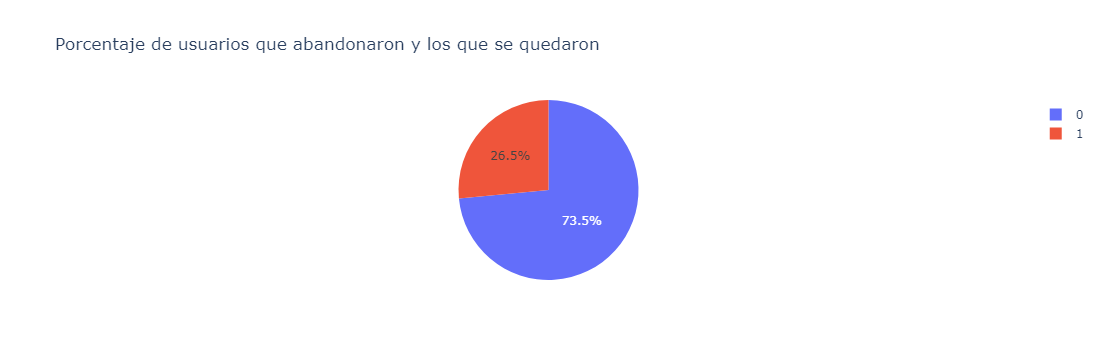

In [14]:
# Gráficamos un pie de los dos grupos(los que abandonaron y los que se quedaron) 
fig1 = go.Figure([go.Pie(labels = data_2group['type_client'], values = data_2group['percentage'])])
fig1.update_layout(title = 'Porcentaje de usuarios que abandonaron y los que se quedaron')
fig1.show()

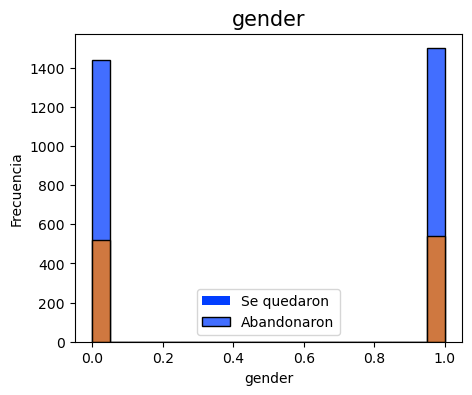

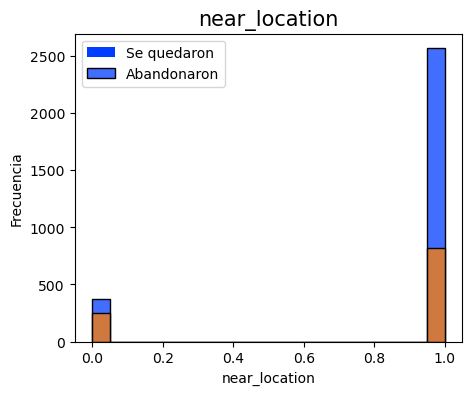

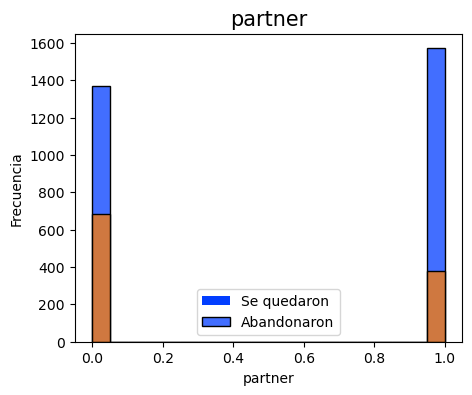

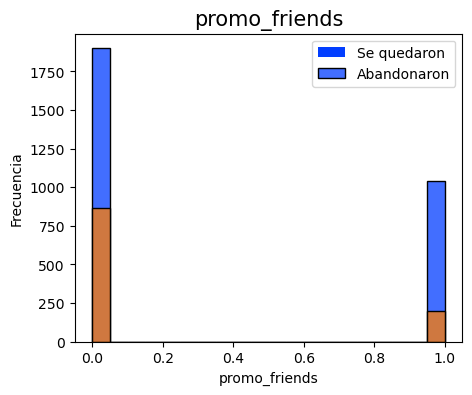

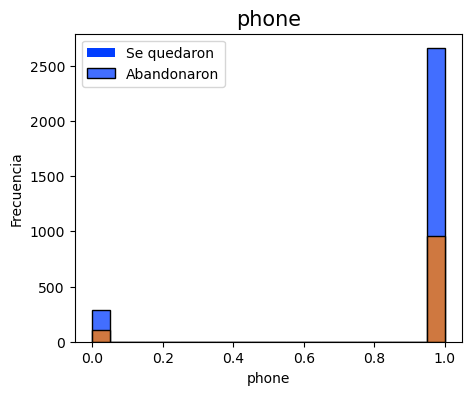

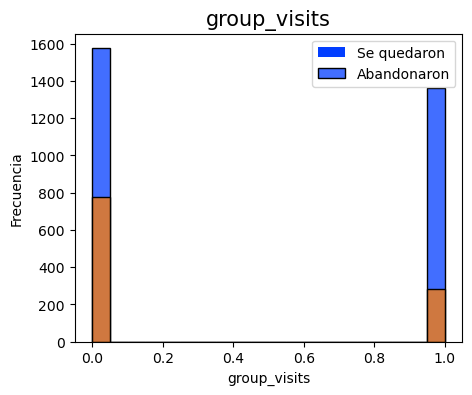

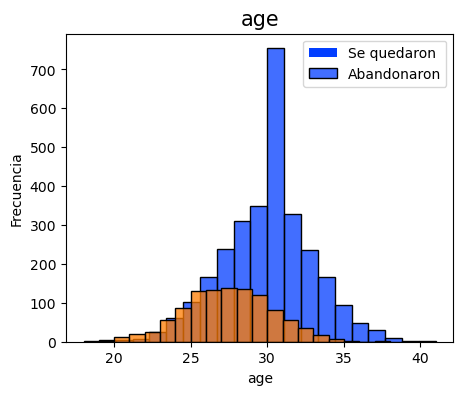

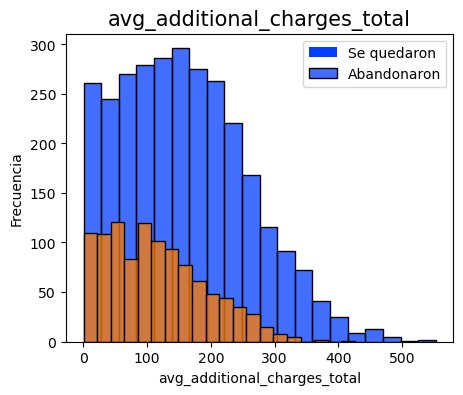

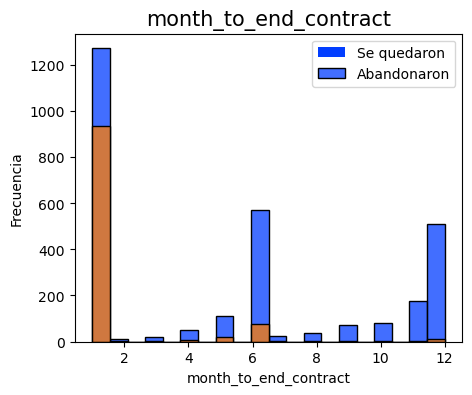

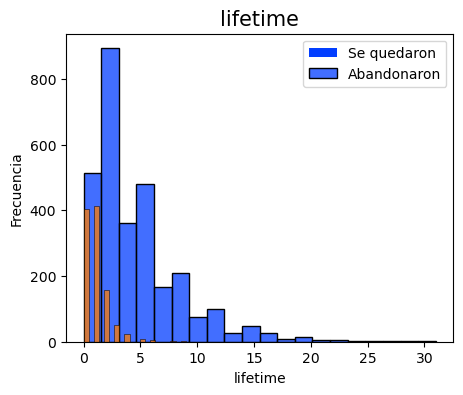

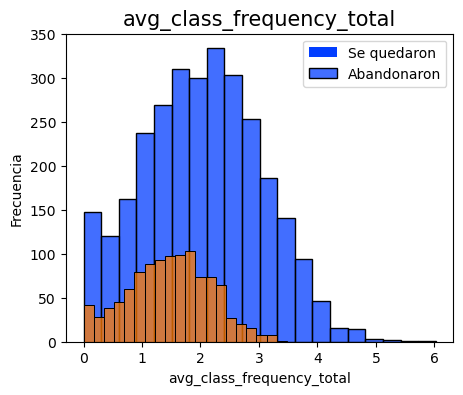

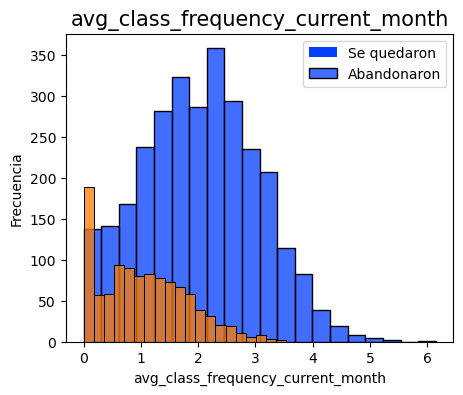

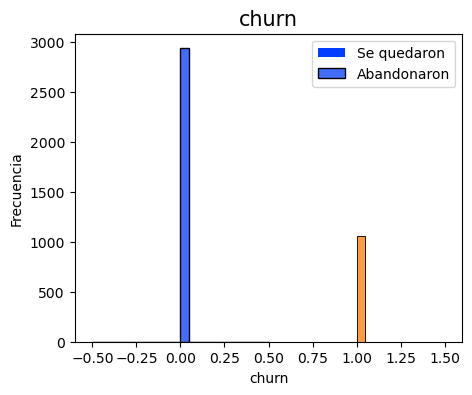

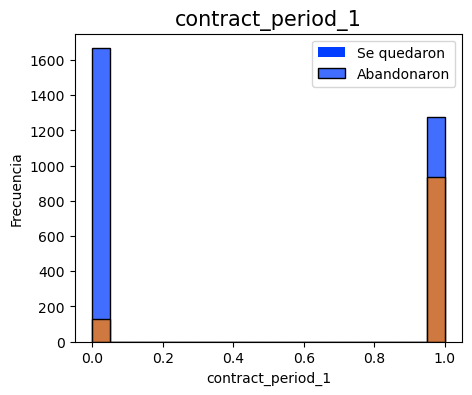

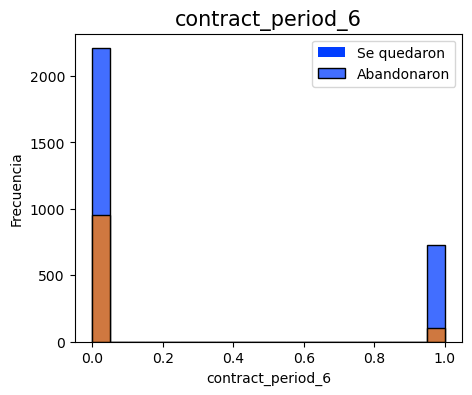

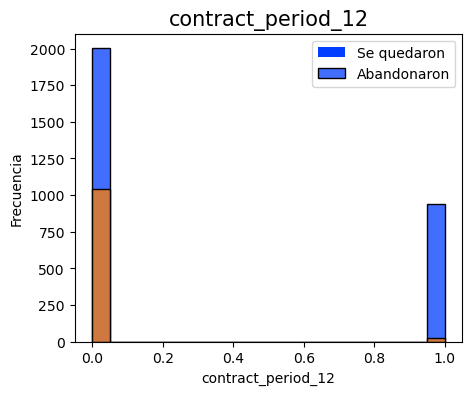

In [15]:
#Gráficos de histogramas comparando los dos grupos(los que abandonaron y los que se quedaron) 
for col in data.columns:
    fig,axes = plt.subplots(figsize=(5,4))
    
    sns.histplot(data.query('churn==0')[col] ,  bins=20)
    sns.histplot(data.query('churn==1')[col],  bins=20)
    plt.title( col, fontsize=15)
    plt.ylabel('Frecuencia')
    plt.legend(['Se quedaron', 'Abandonaron'])
    plt.show()

Observaciones:

- Hay aproximadamente la misma proporción de mujeres y hombres que se fueron y se quedaron en función a la columna de "género".
- Para `near_location`, se quedaron más clientes que viven cerca del gimnasio que los que se fueron.
- Para los "socios", hay una gran proporción de clientes (afiliados a una empresa) que no abandonaron.
- Para `promo_friends`, hay una gran proporción de clientes que se quedaron y no recibieron una promoción de un amigo.
- Para el "teléfono" (independientemente de si el usuario proporcionó su número de teléfono o no), más del doble de los clientes que proporcionaron su número de teléfono se quedaron en la empresa de gimnasio, tal vez, el gimnasio se puso en contacto con ellos para recordarles la expiración de su contrato y convencerles de renovarlo.
- Para `contract_period`, los clientes con un contrato de 1 mes tienen más probabilidades de no continuar, lo más probable es que el primer mes sea un período de prueba.
- Los clientes que abandonaron no participaron en sesiones grupales, lo que se quedaron la mayoría si participan.
- Los clientes menores de 27 años tienen una tasa de abandono más alta en comparación con los mayores. 
- Los clientes que se quedaron en el gimnasio gastaron una cantidad sustancial de dinero en otros servicios del gimnasio, mientras que los que se fueron no gastaron mucho en servicios adicionales proporcionados por el gimnasio.
- Según la "vida útil", la mayoría de los clientes que no renovaron sus contratos son miembros durante aproximadamente 2 meses. Sin embargo, los clientes que se quedaron son miembros por más de 2 meses.
- Los clientes que no abandonaron visitaron el gimnasio con más frecuencia que los que abandonaron.
- Una gran proporción de clientes que no visitaron el gimnasio el mes pasado fueron los que abandonaron o cancelaron.

En general, parece que los clientes que permanecen en el gimnasio tienen valores más altos en casi todas las características.

#### 4.5 Creación de una matriz de correlación.

In [16]:
# Obtenemos la correlación.
corr = data.corr()

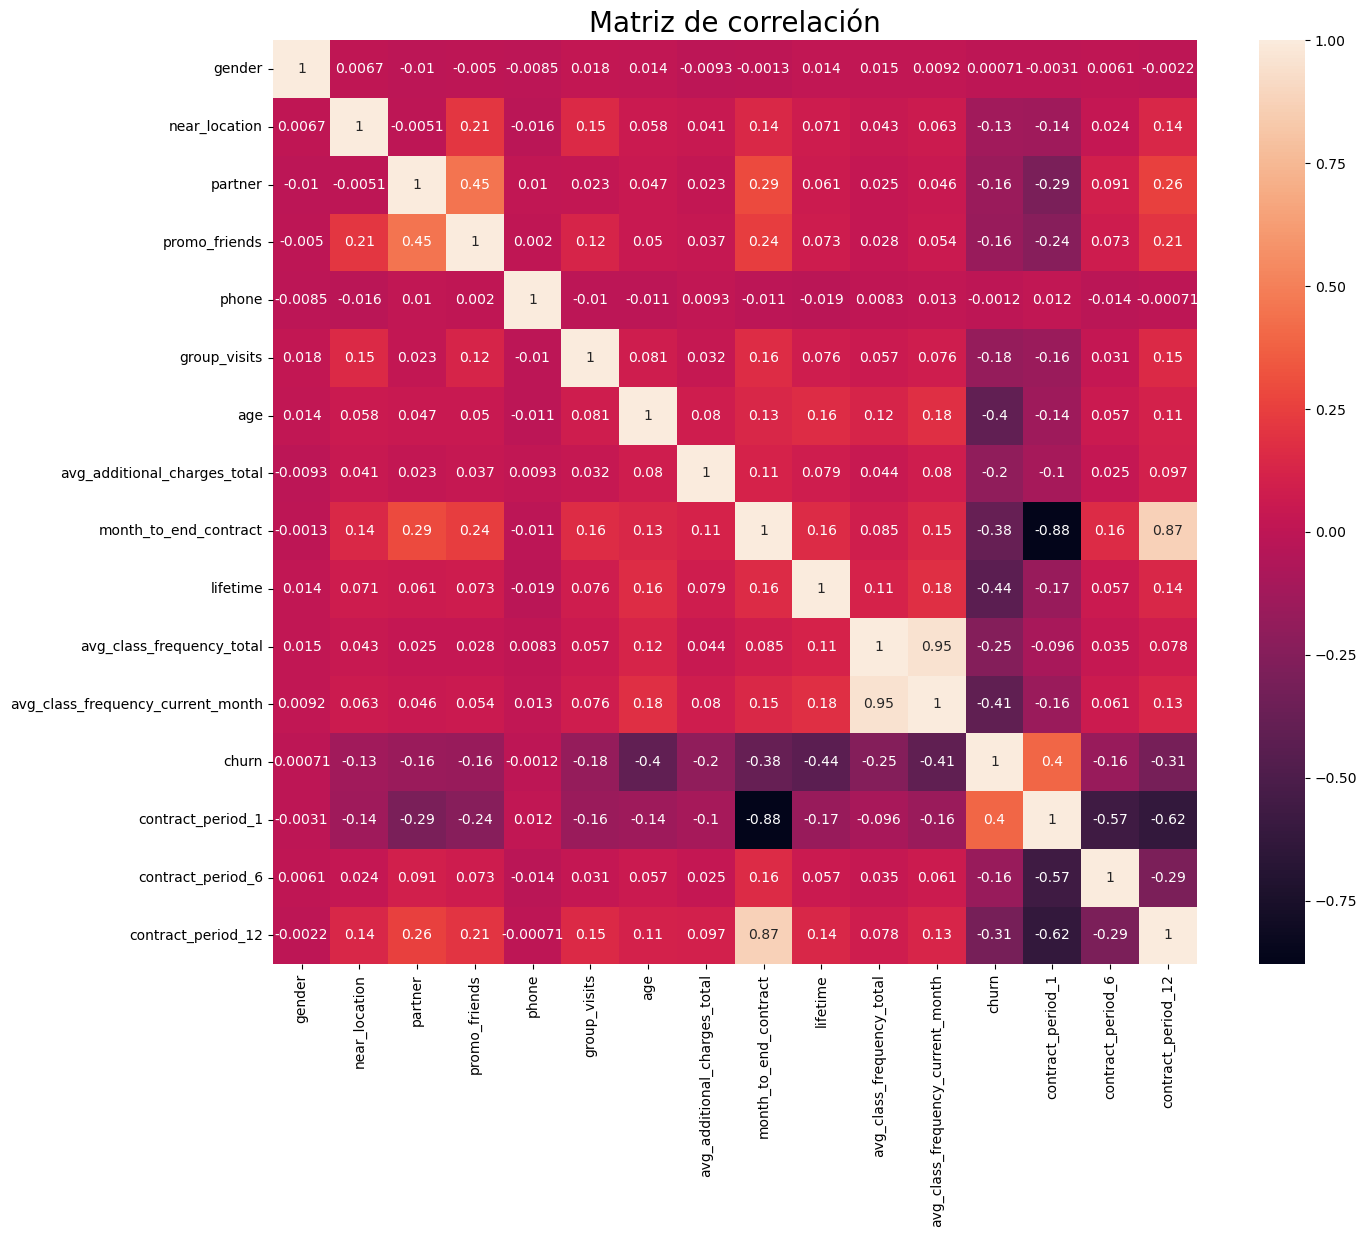

In [17]:
#Gráficamos una matriz de correlación con lo obtenido anteriormente.
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, square=True)
plt.title('Matriz de correlación',fontsize=20)
plt.show()

Observaciones:

- Las características `month_to_end_contract` y `contract_period_12`(contrato de 12 meses) tienen una fuerte correlación que es 0.87.
- Hay una correlación negativa de `contract_period_1` (contrato de un mes) con `month_to_end_contract` (los meses que faltan hasta que expire el contrato) de -0.88, es muy claro que hay una relación.
- Por obvías razones, `avg_class_frequency_total` y `avg_class_frequency_current_month` también tienen una fuerte correlación, están estrechamente relacionadas.
- Existe una correlación negativa entre el abandono y la vida útil (-0.44), la visita mensual promedio (-0.41), la edad (-0.4), el período de contrato (-0.39) y el mes hasta finalizar el contrato (-0.38).
- Las características restantes tienen una correlación débil.

Conclusiones:


En general, todos los clientes que abandonaron el gimnasio tienen un período de contrato más corto, generalmente son más jóvenes, gastan menos en servicios de gimnasio y visitan menos el gimnasio en comparación con los clientes que se quedaron.s.

[Volver al Índice](#back)

##  5. Construcción de un modelo para predecir la cancelación de usuarios<a name='step5'></a>

Para que nuestro modelo funcione, necesitamos asociar todas nuestras características a dos clases: abandono/no abandono y entrenar el modelo para que adivine cada clase correctamente, cuando se le proporciona un conjunto de características.

Examinaremos dos algoritmos: regresión logística y bosque aleatorio.

En esta etapa pretendemos:

- Cree un modelo de clasificación binaria para clientes donde la característica objetivo sea la salida del usuario el próximo mes.
- Evaluar la exactitud, la precisión y la recuperación de ambos modelos y ver qué modelo dio mejores resultados.
- Por último veremos que característica más influyente para un resultado positivo (clientes que abandonan).

In [18]:
#División de los datos en conjuntos de entrenamiento y validación.
X= data.drop('churn', axis=1)
y= data['churn']

# División de los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Aplicar StandardScaler 
scaler = StandardScaler()

# Entrenar y transformar
X_train_st = scaler.fit_transform(X_train)

# Aplicar estandarización a la matriz de características
X_test_st = scaler.transform(X_test)
 
# Declaramos modelos a usar - regresión logística y bosque aleatorio
models = [LogisticRegression(random_state=0),RandomForestClassifier(random_state=0)]


In [19]:
# la función que toma el modelo y los datos como métricas de entrada y salida
def make_prediction(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    print('Exactitud:{:.2f}'.format(accuracy_score(y_test, y_pred))),
    print('Precisión:{:.2f}'.format(precision_score(y_test, y_pred))),
    print('Recall:{:.2f} '.format(recall_score(y_test, y_pred)))

for model in models:
    print('-',model,': ')
    make_prediction(model,X_train_st, y_train, X_test_st,y_test)

- LogisticRegression(random_state=0) : 
Exactitud:0.92
Precisión:0.85
Recall:0.83 
- RandomForestClassifier(random_state=0) : 
Exactitud:0.91
Precisión:0.83
Recall:0.81 


In [20]:
# Obtener características importantes
features = pd.DataFrame(model.feature_importances_) 
features['feature'] = X.columns
features.columns = ['coeff', 'feature']
features = features.reindex(columns = ['feature', 'coeff'])
features.sort_values(by = 'coeff', ascending = False)

feature     coeff
9                            lifetime  0.283995
11  avg_class_frequency_current_month  0.175520
6                                 age  0.123872
10          avg_class_frequency_total  0.121273
7        avg_additional_charges_total  0.090752
8               month_to_end_contract  0.055174
12                  contract_period_1  0.048931
14                 contract_period_12  0.025108
5                        group_visits  0.015770
0                              gender  0.012582
3                       promo_friends  0.011074
2                             partner  0.010763
1                       near_location  0.010179
13                  contract_period_6  0.008209
4                               phone  0.006796


Conclusión:

Los dos modelos dieron casi el mismo resultado en "Exactitud". Sobre la puntuación de "Precisión" entonces la regresión logística dió una puntuación más alta que bosque aleatorio, y la puntuación de "Recall" (recuperación), la regresión logística dio una puntuación más alta que el modelo bosque aleatorio, lo cual, representa la capacidad que tiene el modelo para predecir correctamente los aspectos positivos a partir de los positivos reales.

El modelo de regresión logística dio un resultado ligeramente mejor que el modelo de bosque aleatorio.

Y la característica más influyente para un resultado positivo (clientes que abandonan) es la vida útil, entonces si el valor de vida útil hubiera aumentado, la probabilidad de predecir habría cambiado. 

[Volver al Índice](#back)

##  6. Creación clústeres de usuarios<a name='step6'></a>

Ahora vamos a identifica los clústeres de objetos (usuarios/as), para esto vamos a realizar lo siguiente:

- Estandarizar los datos.
- Crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Utilizar el gráfico resultante para estimar el número de clústeres que puedes destacar.
- Entrenar el modelo de clusteringcon el algortimo K-means y predecir los clústeres de clientes.
- Ver los valores medios de característica para los clústeres.
- Distribuciones de características para los clústeres.
- Calcular la tasa de cancelación para cada clúster. 

#### 6.1 Estandarizar los datos.

In [21]:
# crear un objeto StandardScaler
scaler = StandardScaler()

# entrenar y transformar
X_scaler = scaler.fit_transform(X)

#### 6.2 Crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Utilizar el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [22]:
# Creando matriz con linkage
linked = linkage(X_scaler, method = 'ward')

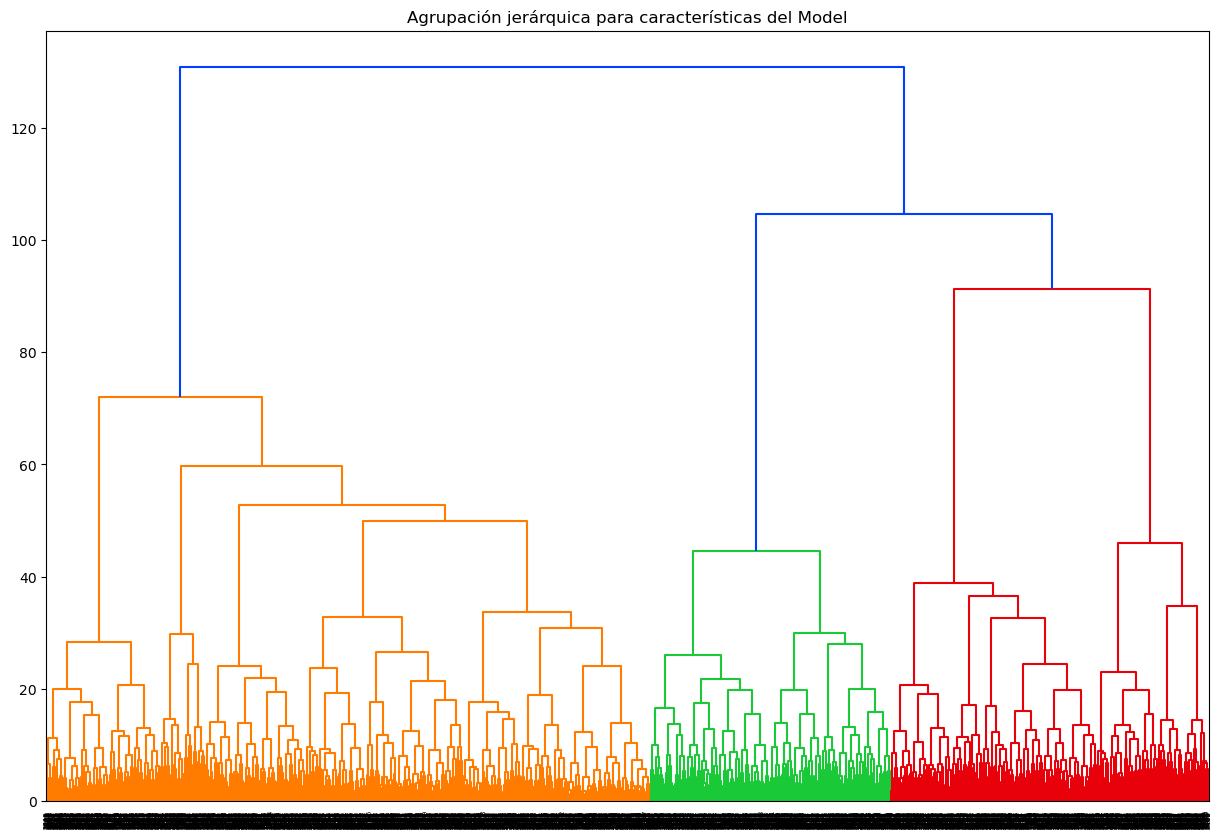

In [23]:
#Crear dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para características del Model')
plt.show() 

#### 6.3 Entrenar el modelo de clusteringcon el algortimo K-means y predecir los clústeres de clientes.

In [24]:
# agrupar objetos paso a paso. KMeans se utiliza cuando ya se conoce el n = 5
km = KMeans(n_clusters = 5, random_state=0)

# aplicar el algoritmo a los datos y almacenar los índices de los clusters sugeridos por el algoritmo
labels = km.fit_predict(X_scaler)

In [25]:
# agregar los grupos calculados a los datos
data['cluster'] = labels
data.head()

gender  near_location  partner  promo_friends  phone  group_visits  age  \
0       1              1        1              1      0             1   29   
1       0              1        0              0      1             1   31   
2       0              1        1              0      1             0   28   
3       0              1        1              1      1             1   33   
4       1              1        1              1      1             0   26   

   avg_additional_charges_total  month_to_end_contract  lifetime  \
0                     14.227470                      5         3   
1                    113.202938                     12         7   
2                    129.448479                      1         2   
3                     62.669863                     12         2   
4                    198.362265                      1         3   

   avg_class_frequency_total  avg_class_frequency_current_month  churn  \
0                   0.020398                           0.000000      0   
1                   1.922936                           1.910244      0   
2                   1.859098                           1.736502      0   
3                   3.205633                           3.357215      0   
4                   1.113884                           1.120078      0   

   contract_period_1  contract_period_6  contract_period_12  cluster  
0              False               True               False        4  
1              False              False                True        0  
2               True              False               False        3  
3              False              False                True        0  
4               True              False               False        3

#### 6.4 Ver los valores medios de característica para los clústeres.

In [26]:
# calcular los promedios de características para cada grupo
cluster_avg = data.groupby(['cluster']).mean().round(4).T.reset_index()
# renombrar columnas
cluster_avg = cluster_avg.rename(columns = {'index': 'feature'})
# ver resultados
cluster_avg

cluster                            feature         0         1         2  \
0                                   gender    0.5083    0.5536    0.5139   
1                            near_location    0.9323    0.9904    0.0000   
2                                  partner    0.7156    0.3379    0.4282   
3                            promo_friends    0.4771    0.2761    0.0718   
4                                    phone    0.9031    0.9025    0.9074   
5                             group_visits    0.5448    0.4712    0.1921   
6                                      age   29.8167   30.1607   28.3611   
7             avg_additional_charges_total  163.5900  159.3751  130.6815   
8                    month_to_end_contract   10.8396    1.0041    1.0000   
9                                 lifetime    4.6646    4.9808    2.5648   
10               avg_class_frequency_total    2.0141    2.6515    1.6725   
11       avg_class_frequency_current_month    2.0070    2.6372    1.4494   
12                                   churn    0.0240    0.0975    0.5208   
13                       contract_period_1    0.0000    0.9986    1.0000   
14                       contract_period_6    0.0000    0.0014    0.0000   
15                      contract_period_12    1.0000    0.0000    0.0000   

cluster         3         4  
0          0.4752    0.5168  
1          1.0000    0.8618  
2          0.3340    0.5757  
3          0.2214    0.3750  
4          0.9094    0.8954  
5          0.3168    0.4423  
6         27.9800   29.5445  
7        126.2413  151.3800  
8          1.0000    5.6178  
9          2.1422    4.1370  
10         1.2545    1.9411  
11         0.9781    1.8876  
12         0.6088    0.1250  
13         1.0000    0.0000  
14         0.0000    1.0000  
15         0.0000    0.0000

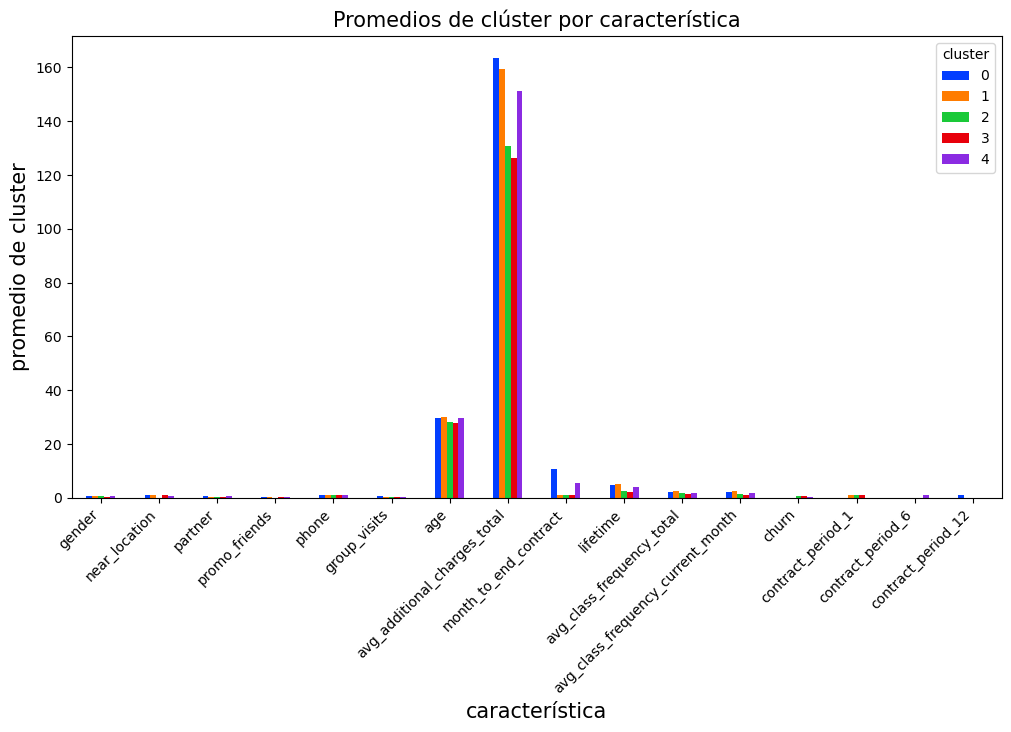

In [27]:
# trazar un gráfico de barras de todos los promedios de características para cada grupo
cluster_avg_graph = cluster_avg.plot(kind = 'bar', figsize = (12, 6))
plt.title('Promedios de clúster por característica', size = 15)
cluster_avg_graph.set_xticklabels(cluster_avg['feature'], rotation = 45, ha = 'right')
plt.xlabel('característica', size = 15)
plt.ylabel('promedio de cluster', size = 15)
plt.show()

Volvemos a hacer la gráfica de barras pero eliminando las dos cararacterísticas que tienen números grandes (que son `age` y `avg_additional_charges_total`) para ver más detalle los promedios bajos.

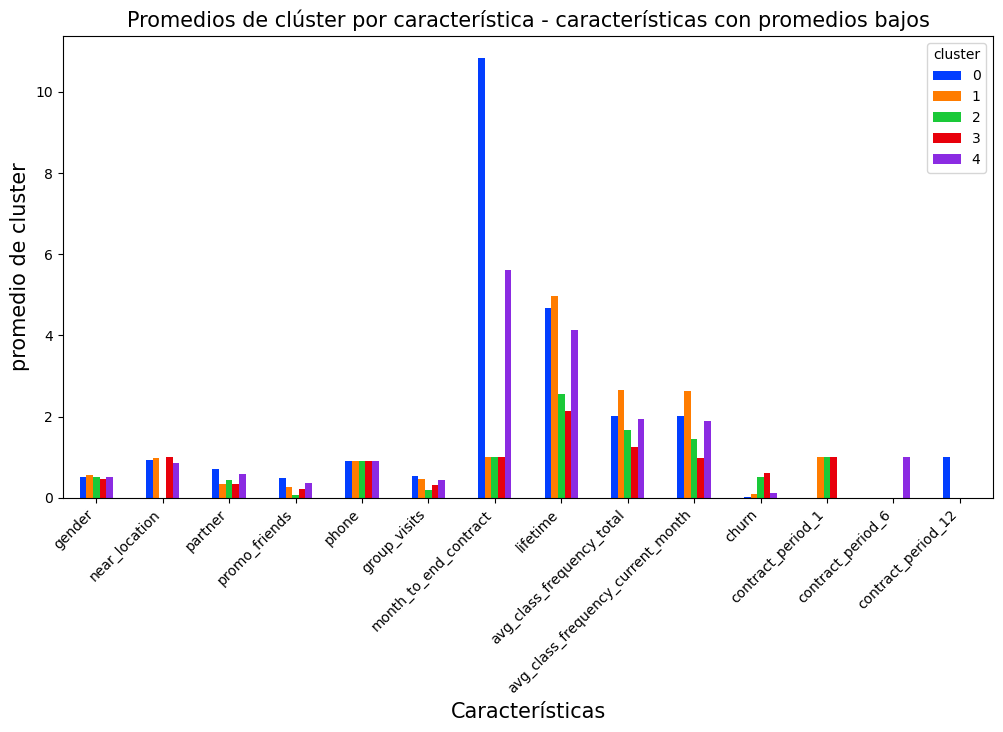

In [28]:
# ampliar las características con valores promedio más bajos
cluster_avg_low_values = cluster_avg.drop([6, 7])

# Un gráfico de barras de características con promedios bajos para cada grupo
cluster_avg_low_values_graph = cluster_avg_low_values.plot(kind = 'bar', figsize = (12, 6))
plt.title('Promedios de clúster por característica - características con promedios bajos', size = 15)
cluster_avg_low_values_graph.set_xticklabels(cluster_avg_low_values['feature'], rotation = 45, ha = 'right')
plt.xlabel('Características', size = 15)
plt.ylabel('promedio de cluster', size = 15)
plt.show()

¿Qué llama la atención?

Hay varias características que tienen un promedio simila como edad, sexo, ubicación cercana y teléfono. En general, los grupos parecen diferir más cuando se trata de características de datos numéricos como lo podemos ver en los clusters 0, 2 y 4. Mientras que los clusters 2 y 3 tienen promedios similares en todas las características.

#### 6.5 Distribuciones de características para los clústeres.

Creamos una tabla de datos para características categóricas por grupo:

In [36]:
# crear una tabla que cuente el número de clientes por estado y los muestre a través del clúster
cat_cluster_table = data.pivot_table(index = 'churn', 
                                 columns = 'cluster',
                                  aggfunc = 'sum')
cat_cluster_table.reset_index()

churn    age                            avg_additional_charges_total  \
cluster            0      1     2      3      4                            0   
0           0  28013  19946  6185  12152  21805                154363.482210   
1           1    611   2011  6067  17171   2776                  2682.897029   

                                                    ... phone                 \
cluster              1             2             3  ...     0    1    2    3   
0        107076.988500  30712.756096  60398.393560  ...   846  594  186  377   
1          8948.108202  25741.637799  71902.492758  ...    21   63  206  576   

             promo_friends                     
cluster    4             0    1   2    3    4  
0        653           451  185  21   99  283  
1         92             7   16  10  133   29  

[2 rows x 76 columns]

Creamos una función para trazar solamente características categóricas (como género, socios, promo de amigos, periodo de contrato etc):

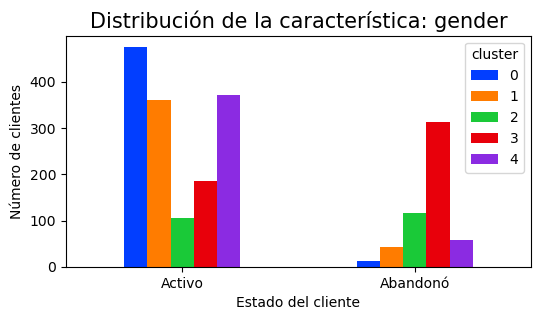

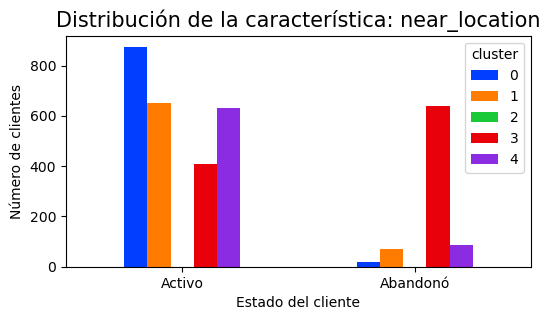

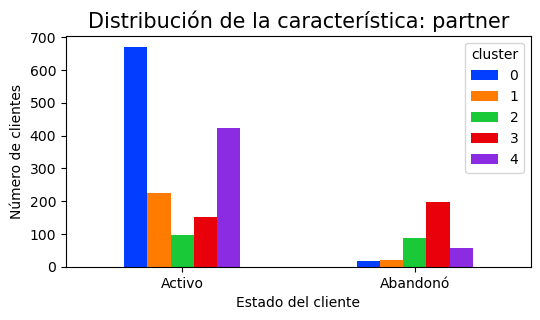

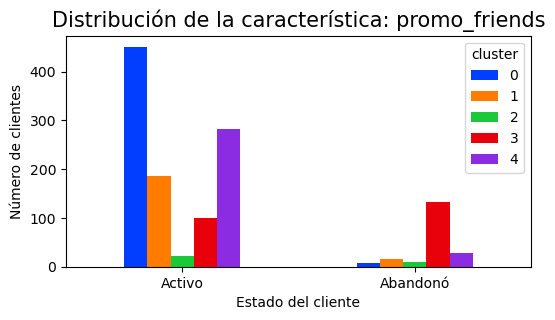

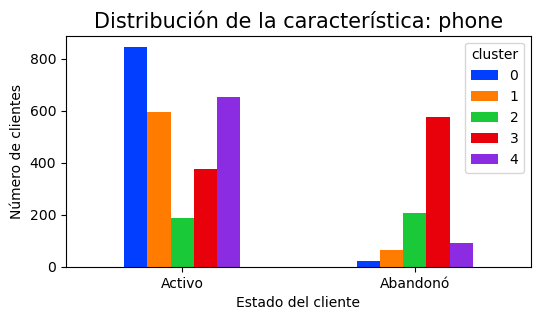

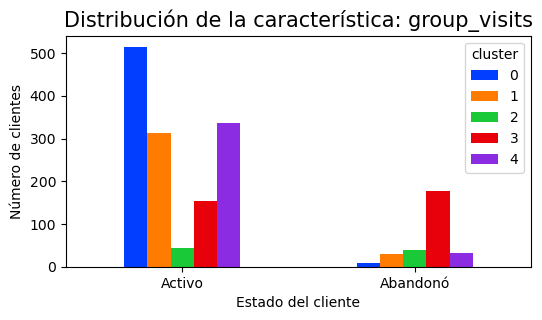

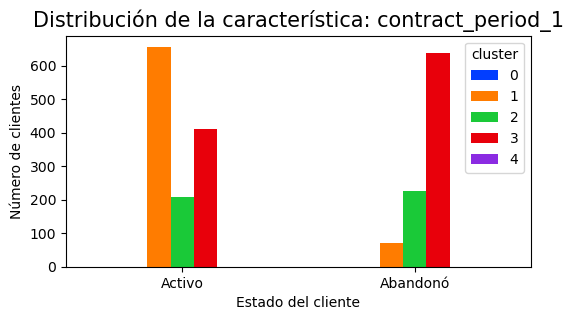

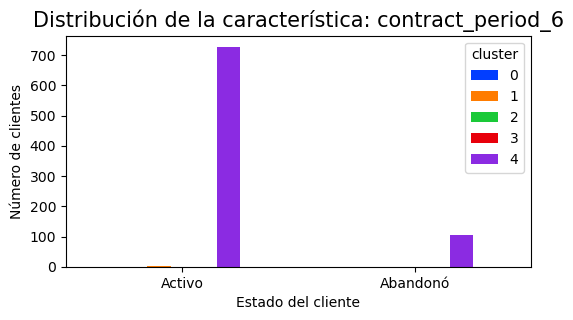

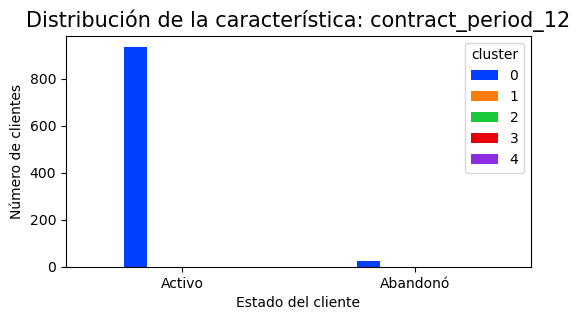

In [32]:
# Separar columnas
feature_cols = ['gender', 'near_location', 'partner',
                 'promo_friends', 'phone', 'group_visits', 
                 'contract_period_1', 'contract_period_6','contract_period_12' ]

# Gráfico de barra con la distribución de cada característica de los 2 grupos clientes que abandonaron o que siguen en cada clústers
for col in feature_cols:
    graph = cat_cluster_table[col].plot(kind = 'bar', figsize=(6,3))
    graph.set_xticklabels(['Activo', 'Abandonó'], rotation = 0)
    plt.title('Distribución de la característica: '+ col, size = 15)
    plt.xlabel('Estado del cliente')
    plt.ylabel('Número de clientes')
    plt.show()

Realizamos otra función para ver el comportamiento de las características tipo númericas usando el gráfico de diagrama de caja, donde veremos media, mediana y cuartiles.

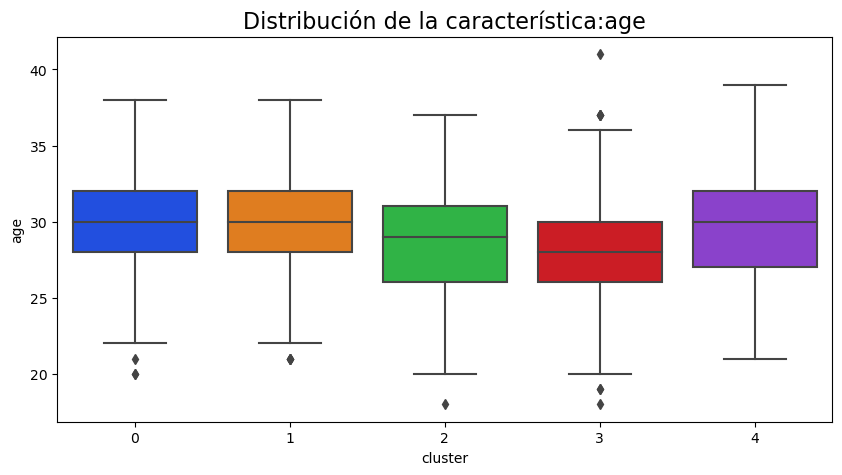

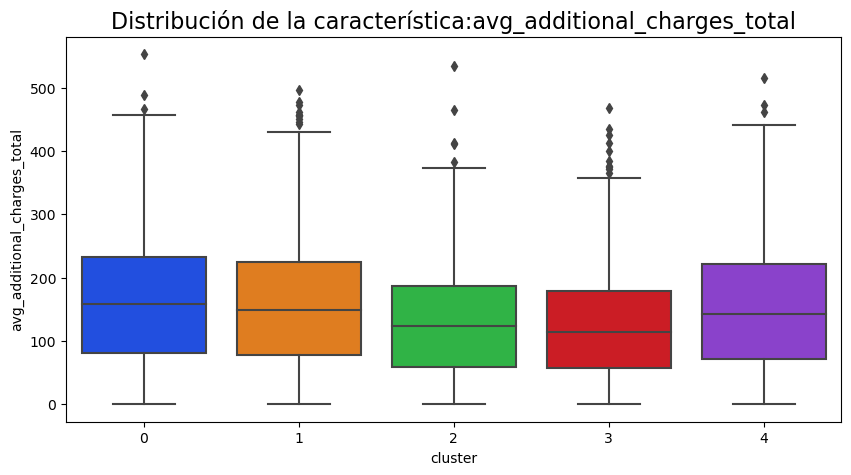

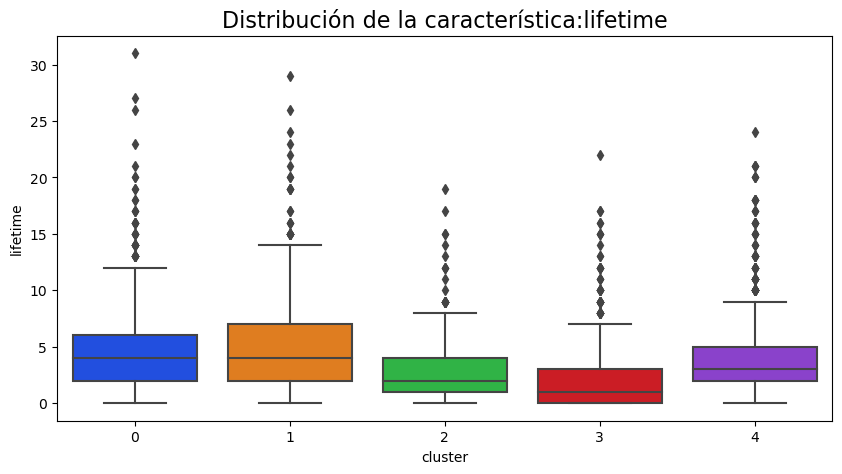

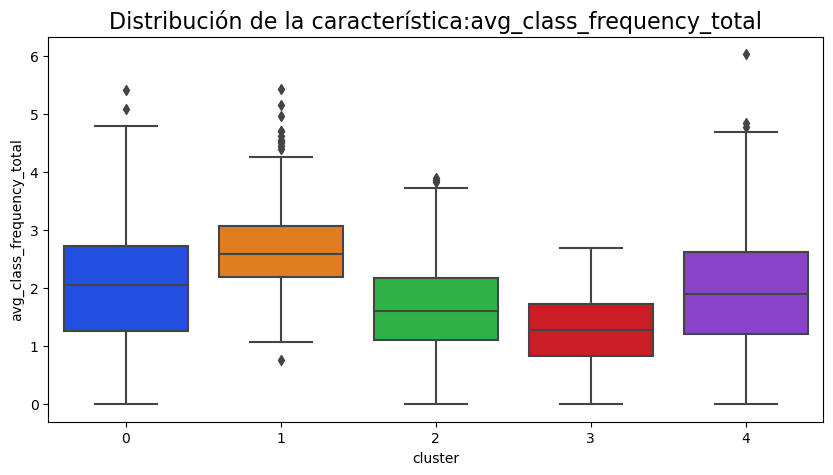

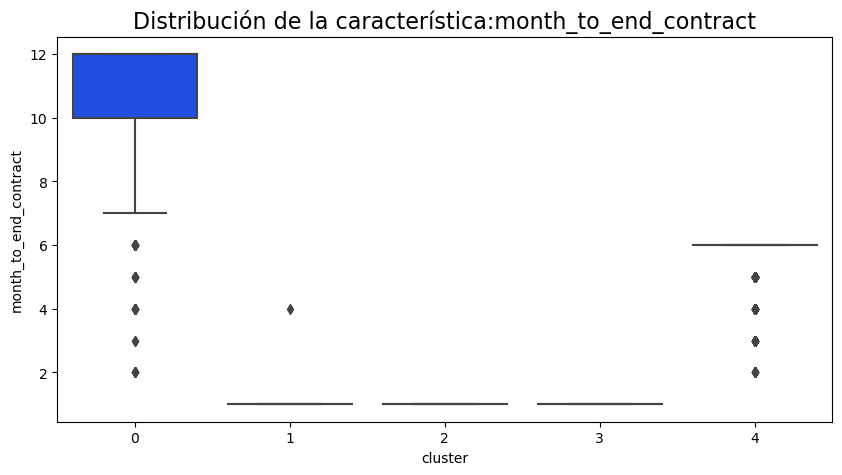

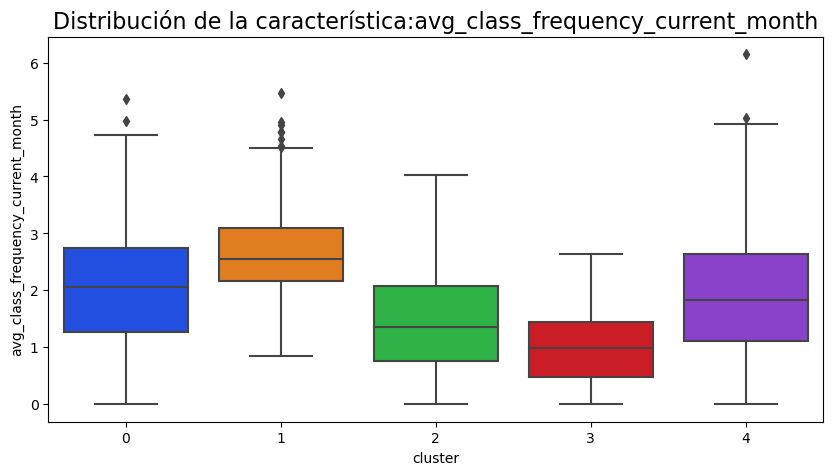

In [33]:

# Separar columnas
numeric_cols = ['age', 'avg_additional_charges_total', 'lifetime',
                'avg_class_frequency_total', 'month_to_end_contract',
                'avg_class_frequency_current_month']

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='cluster', y=data[col] , data=data)
    plt.title('Distribución de la característica:' + col, fontsize=16)
    plt.show()

Con lo anterior, podemos describir cada clusters o grupo de clientes que ABANDONARON:

#### Grupo 0 
- Tasa de abandono(gráfico más abajo) es 2%.
- La edad promedio es entre 29 y 30 años.
- No vive cerca de un gimnasio.
- Pocos estaban afiliados algún socio, apesar de que la mayoría que se quedaron estaba afilados a un socio.
- Algunos tenían contrato de 12 meses y lo abandonaron.
- Los clientes no dejaron su información de contacto.
- Ir al gimnasio una media de 2 veces por semana

#### Grupo 1
- Tasa de abandono(gráfico más abajo) es 10%.
- La edad media es 30 años.
- Pocos viven cerca del gimnasio.
- Pocos estaban afiliados algún socio.
- 5 meses es la vida media de los clientes, que es la más alta.
- Tenía un contrato de un mes.
- Ir al gimnasio una media de 3 veces por semana

#### Grupo 2
- Tasa de abandono(gráfico más abajo) es 52%.
- La edad promedio es 28 años.
- Ninguno de los clientes está afiliado a la empresa.
- 3 meses es la vida media de los clientes
- Tenía un contrato de un mes.
- Ir al gimnasio una media de 1 vez por semana.

#### Grupo 3
- Tasa de abandono(gráfico más abajo) es 61%.
- La edad promedio entre 27 a 28, la más baja de todos los grupos.
- Viven cerca del gimnasio.
- Algunos estaban afilados a algún socio.
- Los clientes dejaron su número de teléfono.
- Más de la mitad de los clientes recibieron un código promocional de un amigo.
- Los clientes asistieron a sesiones grupales
- La cantidad más baja gastada en servicios adicionales de gimnasio.
- 2 meses es la vida media de los clientes, que es la más baja.
- Tenía un contrato de un mes.
- Ir al gimnasio una media es menos de 1 vez por semana.

#### Grupo 4
- Tasa de abandono(gráfico más abajo) es 13%.
- La edad promedio entre 29 y 30.
- Pocos viven cerca del gimnasio.
- Pocos estaban afiliados a algún socio, apesar que los que se quedaron estaba afilados a un socio.
- La cantidad más alta de gastada en servicios adicionales.
- La mayoría tenía un contrato de 6 meses.
- Ir al gimnasio una media de 2 veces por semana

#### 6.6 Calcular la tasa de cancelación para cada clúster.

In [46]:
# Crear una consulta de clientes que abandonan
churn_query = data.query('churn == 1')

# Grupos clusters
churn_cluster_table = churn_query.groupby('cluster').agg({'gender': 'count'}).reset_index()
# nombrar columnas
churn_cluster_table = churn_cluster_table.rename(columns = {'gender': 'num_churned_clients'})
churn_cluster_table

# agregar columnas para el total de clientes
churn_cluster_table['clients_per_cluster'] = data.groupby('cluster')['churn'].count()
# agregar columnas para la tasa de abandono
churn_cluster_table['cluster_churn_rate_%'] = churn_cluster_table['num_churned_clients'] / churn_cluster_table['clients_per_cluster'] * 100
churn_cluster_table.sort_values(by='cluster_churn_rate_%', ascending=False)

cluster  num_churned_clients  clients_per_cluster  cluster_churn_rate_%
3        3                  638                 1048             60.877863
2        2                  225                  432             52.083333
4        4                  104                  832             12.500000
1        1                   71                  728              9.752747
0        0                   23                  960              2.395833

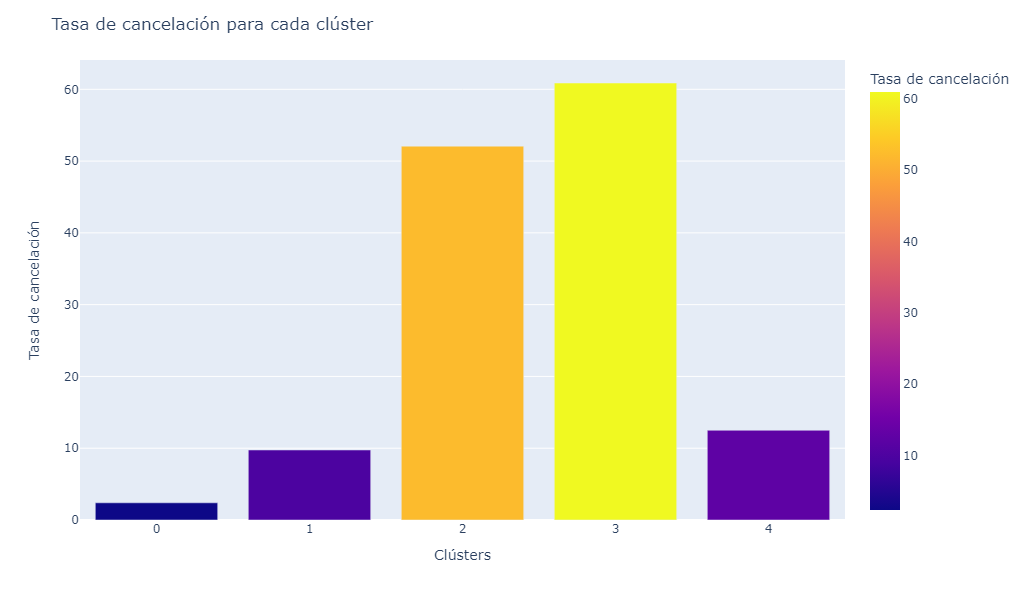

In [47]:
# Gráfico de barras 
fig = px.bar(churn_cluster_table, x='cluster', y='cluster_churn_rate_%', color='cluster_churn_rate_%',
             width=990, height=600, 
             labels = {'cluster': 'Clústers', 'cluster_churn_rate_%': 'Tasa de cancelación' })

# Personalizar el texto interno del gráfico
fig.update_traces(textposition='outside')
fig.update_layout(title_text="Tasa de cancelación para cada clúster")
fig.show()

¿Qué grupos son propensos a irse y cuáles son leales?
Como podemos ver desde arriba, los grupos 2 y 3 son propensos a abandonar, y el grupo 3 tiene la tasa de abandono más alta. El grupo 0 es el más leal de todos y tiene la tasa de abandono más baja. Este grupo tiene los mejores indicadores y debemos centrarnos más en ellos.

¿Difieren en términos de tasa de cancelación?
Las tasas de abandono de los clusters difieren.

[Volver al Índice](#back)

##  7. Conclusiones y recomendaciones básicas sobre el trabajo con clientes<a name='step7'></a>

Los datos contienen 4000 entradas de clientes sobre sus visitas y su estado de membresía.

##### Conclusiones

- Los datos fueron procesados y analizados (EDA2. )
- Se utilizaron 2 modelos probados para pronosticar el abandono de clientes. El modelo de regresión logística dio un mejor resultado que bosque aleatorio. El modelo de regresión logística obtuvimos:
    - Exactitud:0.92
    - Precisión:0.85
    - Recall:0.83 
- Se crearón 5 clusters como perfiles para las características del cliente.
- Clientes que probablemente abandonan:
    - tienen un contrato de 1 mes o les queda un 1 mes de contrato.
    - visitar el gimnasio menos de 2 veces a la semana.
    - no gastan en  otros productos o servicios del gimnasio.
- Los clientes que permanencen:
    - son parte de un socio de empresa.
    - aplican el código de promoción de amigo.
    - asisten a las clases de grupales.
    - gastan más en otros productos o servicios del gimnasio.

##### Recomendaciones:

- Interactuar especialmente con clientes que tienen un contrato de 1 mes o que están por llegar a un mes de contrato.
- Los clientes no afiliados a la empresa también son más propensos a abandonar, hay que ofrecer un incentivo como descuentos y promociones a estos clientes.
- Animarlos a visitar más de 2 veces por semana y a participar en clases grupales.
- También deben prestar mucha atención a los clientes que rara vez gastan o no gastan extra en otros servicios del gimnasio, estos clientes son propensos a abandonar el gimnasio. Podríamos ofrecer un incentivo o recompensas: cuanto más visiten el gimnasio, y entre mayores las visitas serán las recompensadas.
- Utilizar su número de teléfono para enviar recordatorios para ir al gimnasio, asistir a una clase o promocionar servicios especiales.
- Continuar manteniendo y creando relaciones con empleadores que son socios actuales y futuros.

[Volver al Índice](#back)